## Carregamento da imagem e pré-processamento

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
imagem = cv2.imread('people1.jpg')

#convertendo de BGR(OpenCV) para RGB(Matplotlib) para exibir no notebook e não em outra janela, sem fins de processamento
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)


In [4]:
imagem.shape

#(altura, largura, número de canais - 3 (RGB))
#essa imagem está com um tamanho bom, caso esteja muito grande, recomenda-se diminuir para melhorar o processamento
#para diminuir utilize: cv2.resize(imagem, (altura, largura))


(408, 612, 3)

In [5]:
#o número de pixels da imagem é o produto entre altura*largura*número_de_canais
print(f'Número de pixels da imagem: {408*612*3}')

Número de pixels da imagem: 749088


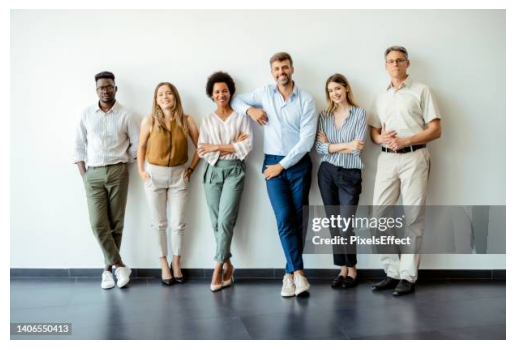

In [6]:
plt.axis('off')
plt.imshow(imagem_rgb)
plt.show()


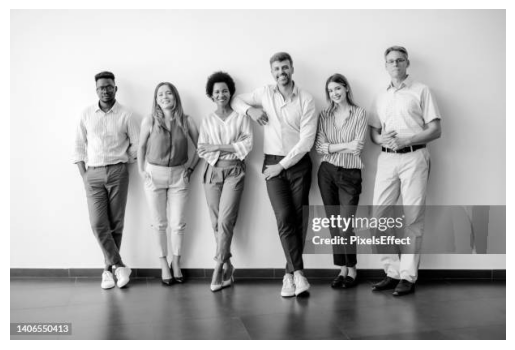

In [9]:
#processamento
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

#apenas para exibir no notebook
imagem_cinza_plot = cv2.cvtColor(imagem_cinza, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(imagem_cinza_plot)
plt.show()

In [10]:
imagem_cinza.shape

#não há mais a informação do canal, apenas 1 valor


(408, 612)

In [11]:
print(f'Número de pixels da imagem em tons de cinza: {408*612}')

Número de pixels da imagem em tons de cinza: 249696
